In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
plt.style.use('dark_background')
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/Kaggle_ Exercises

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/Kaggle_ Exercises


In [2]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Kaggle_ Exercises/heart.csv')

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='magma')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


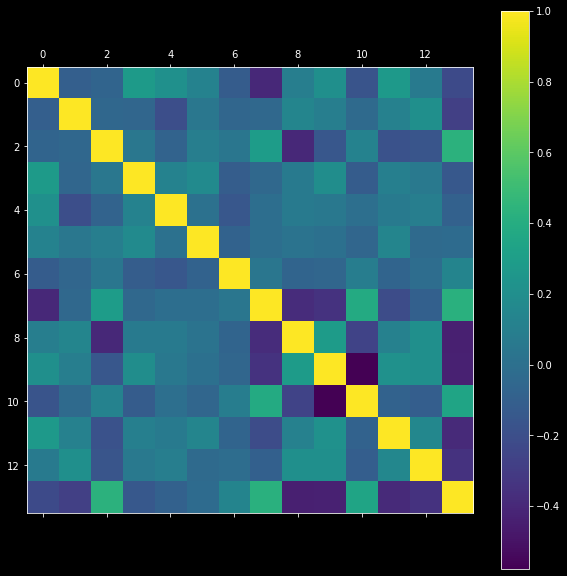

In [ ]:
f = plt.figure(figsize=(10, 10))
plt.matshow(corr, fignum=f.number)
plt.colorbar()

We dont see any clear correlation betweem the variables of the data

<Figure size 864x864 with 0 Axes>

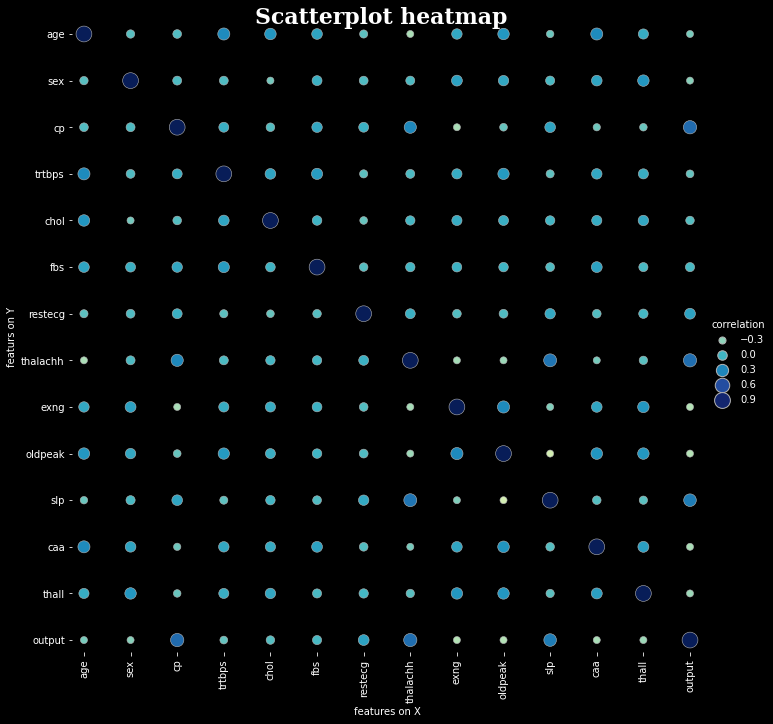

In [ ]:
fig = plt.figure(figsize=(12,12))
corr_mat = df.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="YlGnBu", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)
g.set(xlabel="features on X", ylabel="featurs on Y", aspect="equal")
g.fig.suptitle('Scatterplot heatmap',fontsize=22, fontweight='bold', fontfamily='serif')
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")
plt.show()

exng        0.436757
cp          0.433798
oldpeak     0.430696
thalachh    0.421741
caa         0.391724
slp         0.345877
thall       0.344029
sex         0.280937
age         0.225439
trtbps      0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: output, dtype: float64


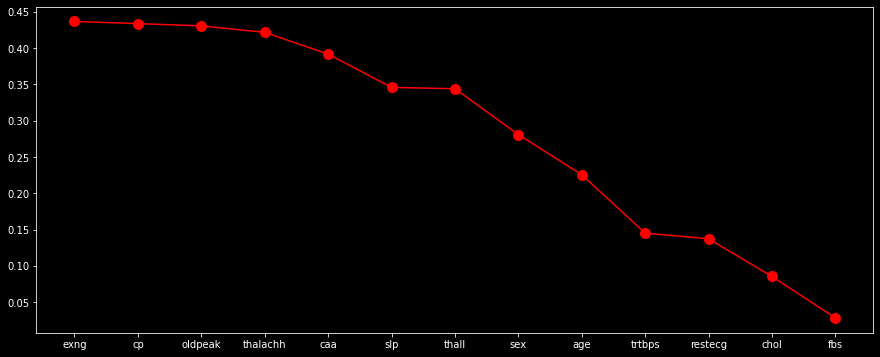

In [ ]:
C=abs(corr["output"]).sort_values(ascending=False)[1:]
print(C)
plt.figure(figsize=(15,6))
plt.plot(C.index,C,color="red")
plt.scatter(C.index,C,color="red",lw=5)
plt.show()

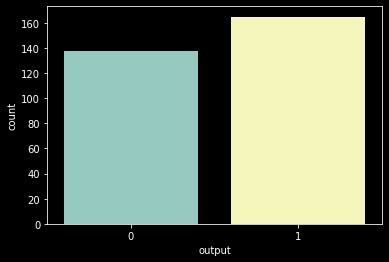

In [ ]:
sns.countplot(data=df,x=df["output"])

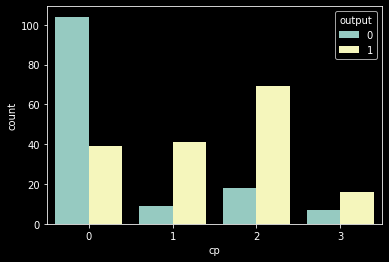

In [ ]:
sns.countplot(data=df,x=df["cp"],hue="output")

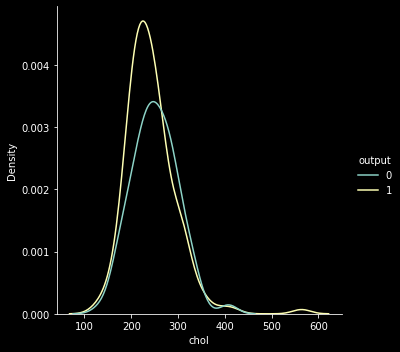

In [ ]:
sns.displot(data=df,x=df["chol"],kind="kde",hue="output")

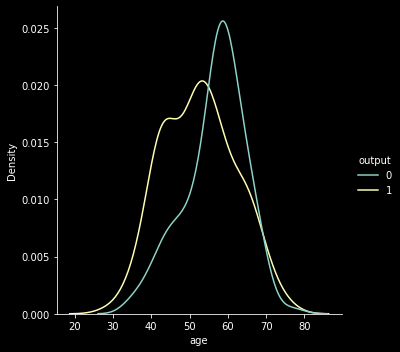

In [ ]:
sns.displot(data=df,x=df["age"],kind="kde",hue="output")

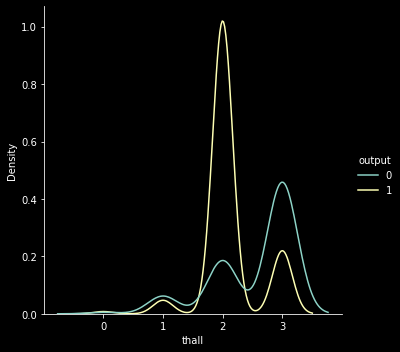

In [ ]:
sns.displot(data=df,x=df["thall"],kind="kde",hue="output")

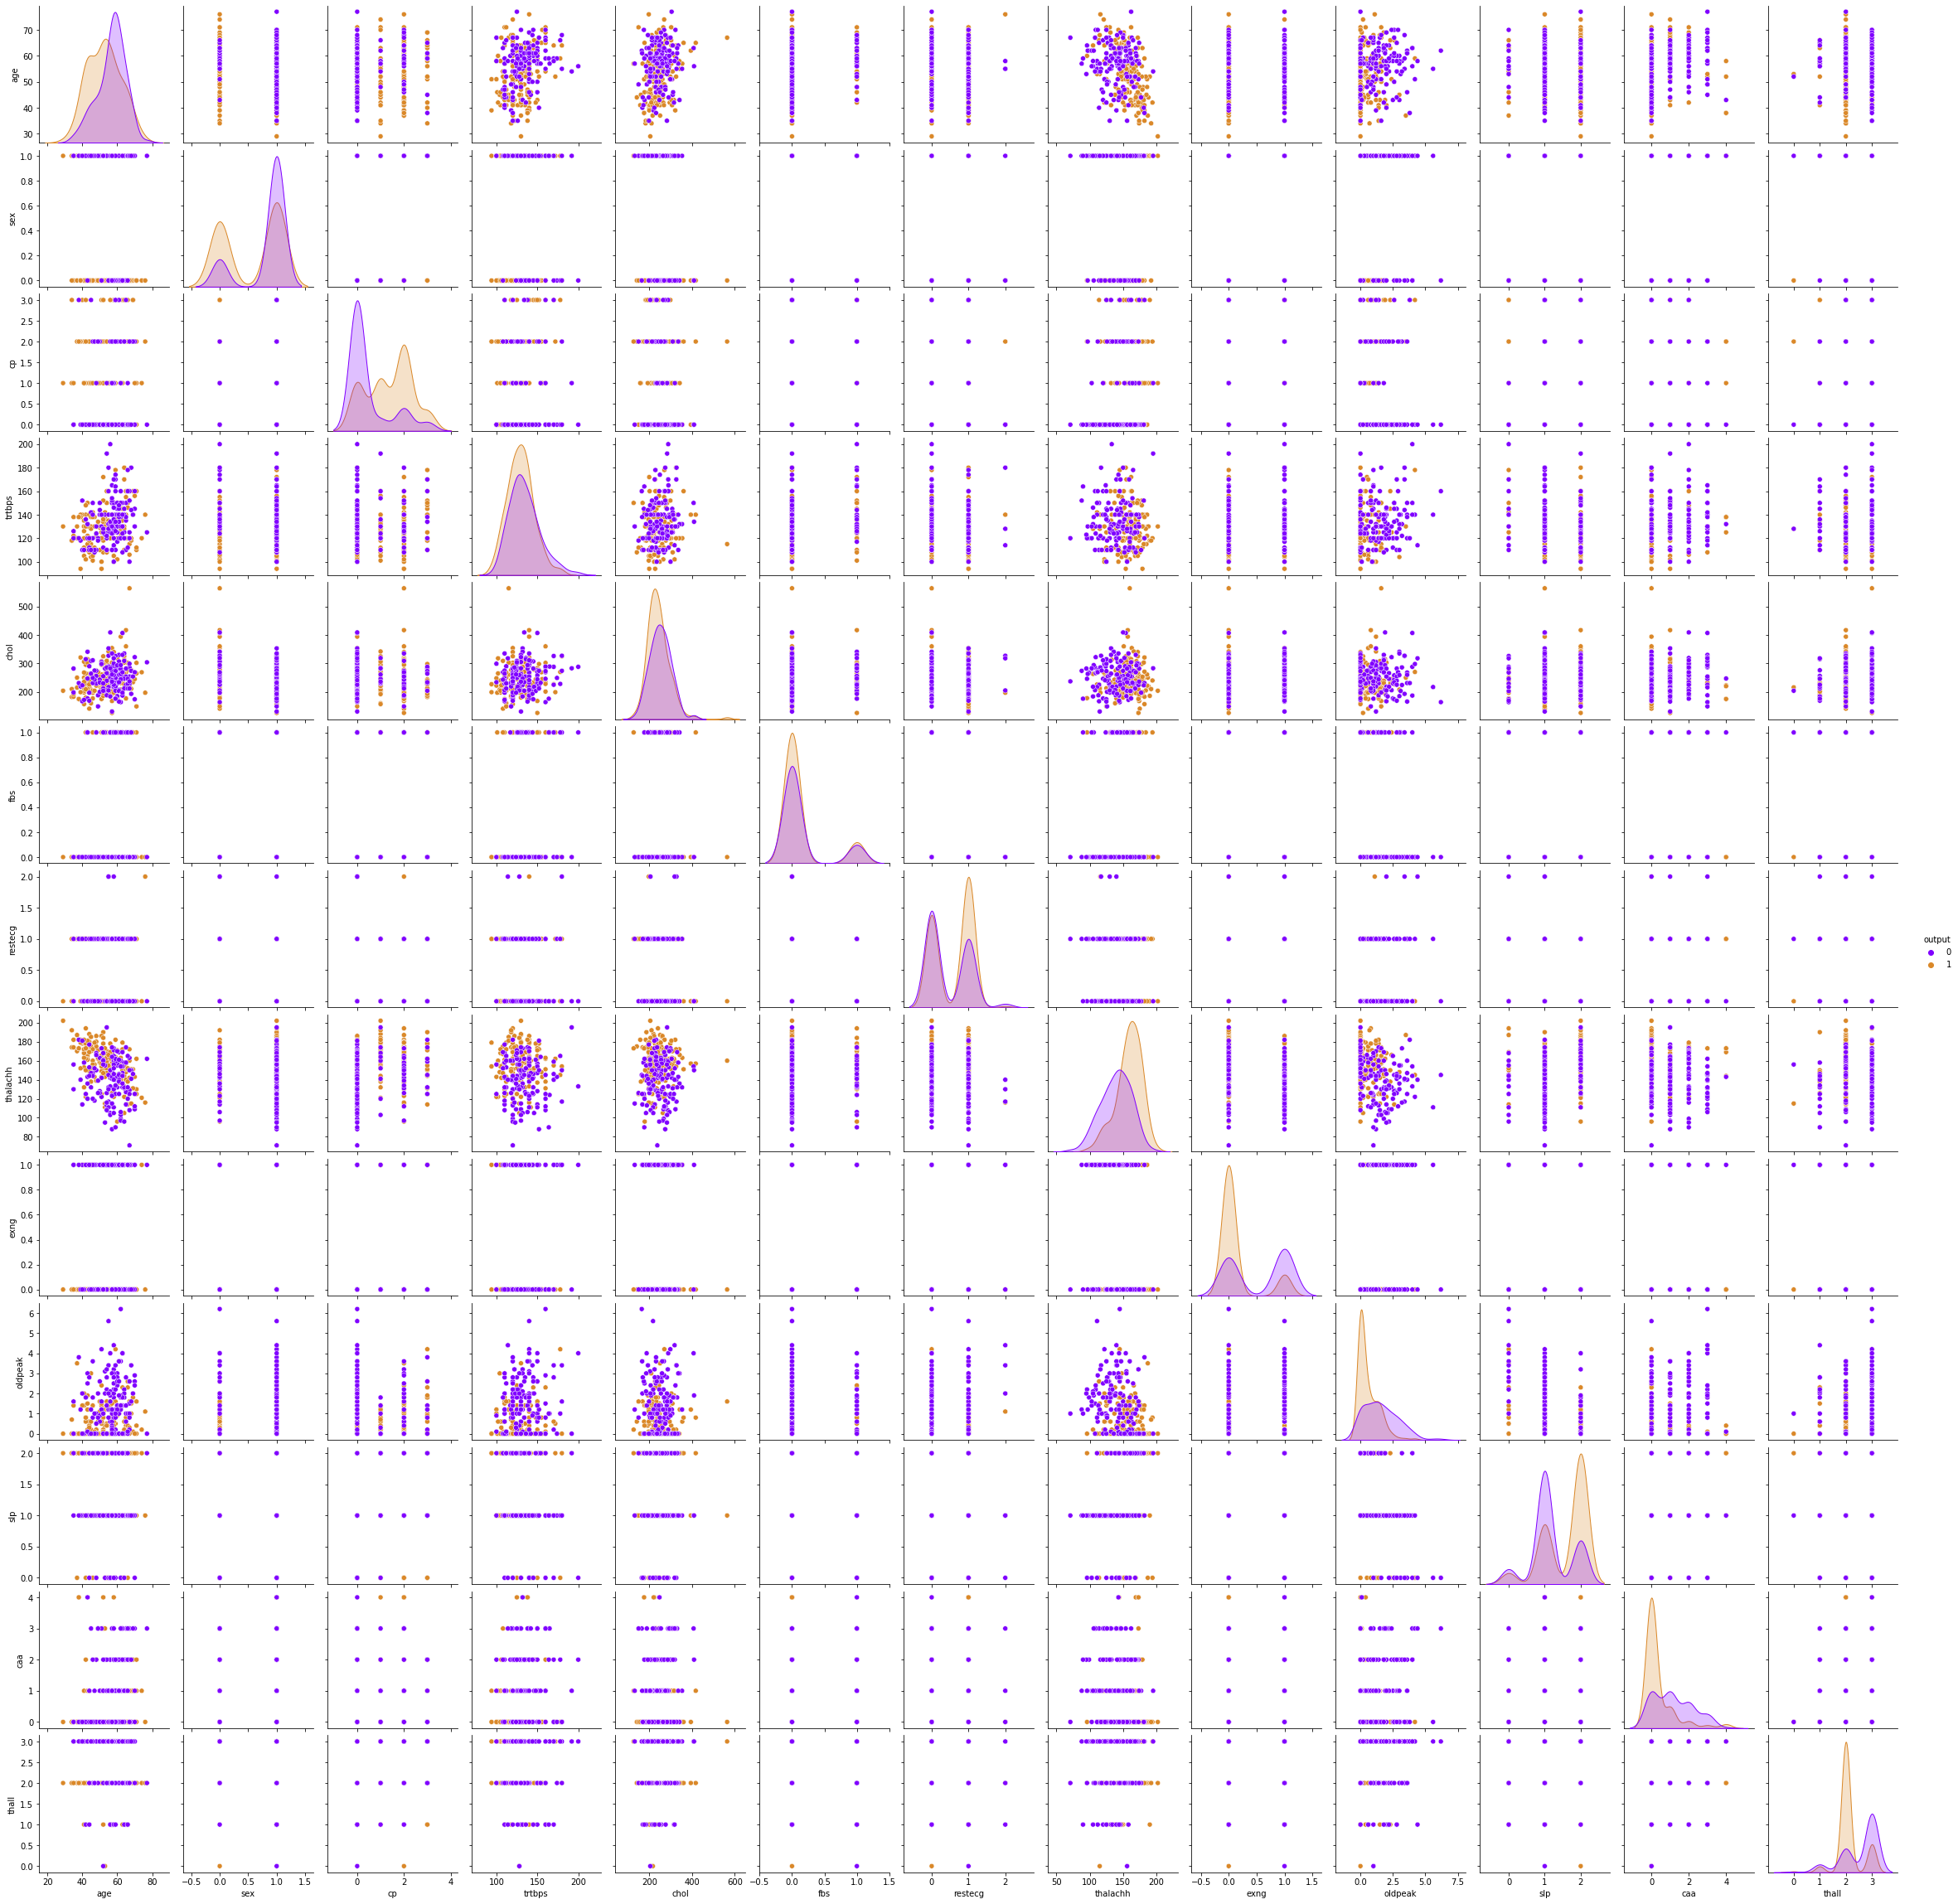

In [ ]:
sns.pairplot(df,hue='output',palette = ["#8000ff","#da8829"])
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
print(df['output'].value_counts())
ax=px.pie(df, names= "output" ,template= "plotly_dark",title="Output",hole=0.8)
ax.show()

1    165
0    138
Name: output, dtype: int64


In [ ]:
import plotly.graph_objects as go

In [ ]:
fig=go.Figure()
fig.add_trace(go.Box(y=df["age"],name="Male",marker_color="blue",boxpoints="all",whiskerwidth=0.3))
fig.add_trace(go.Box(y=df["age"],name="Female",marker_color="#e75480",boxpoints="all",whiskerwidth=0.3))
fig.update_layout(template="plotly_dark",title="Age Distribution",height=600)
fig.show()

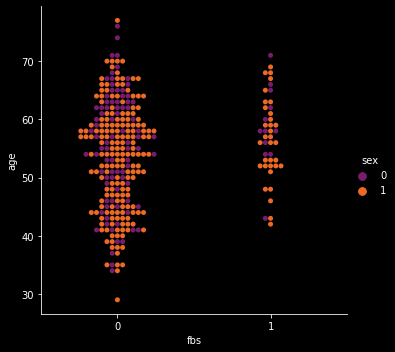

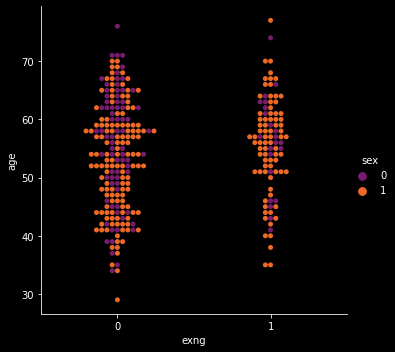

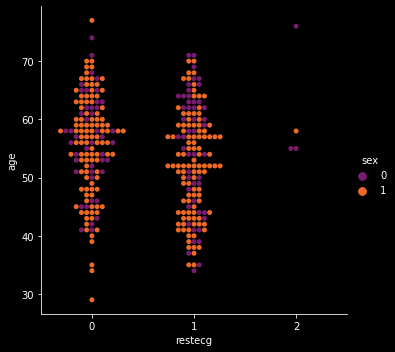

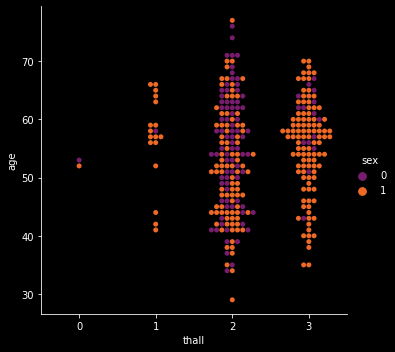

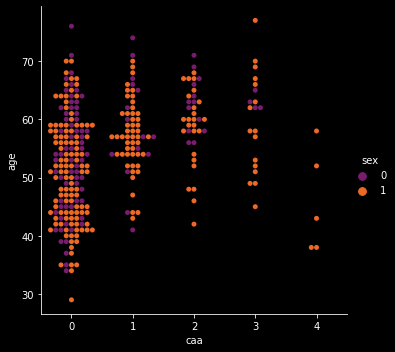

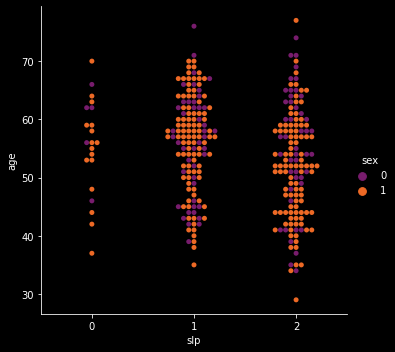

In [ ]:
class_cols=["output",'cp',"fbs","exng","restecg","thall","caa","slp"]
for col in class_cols[2:]:
    ax=px.pie(df, names= col ,template= "plotly_dark",title=col,hole=0.7)
    ax.show()
    
#Swarm Plots
for col in class_cols[2:]:
    sns.catplot(kind="swarm", data=df, x=col, y="age", palette="inferno", hue="sex")
plt.show()

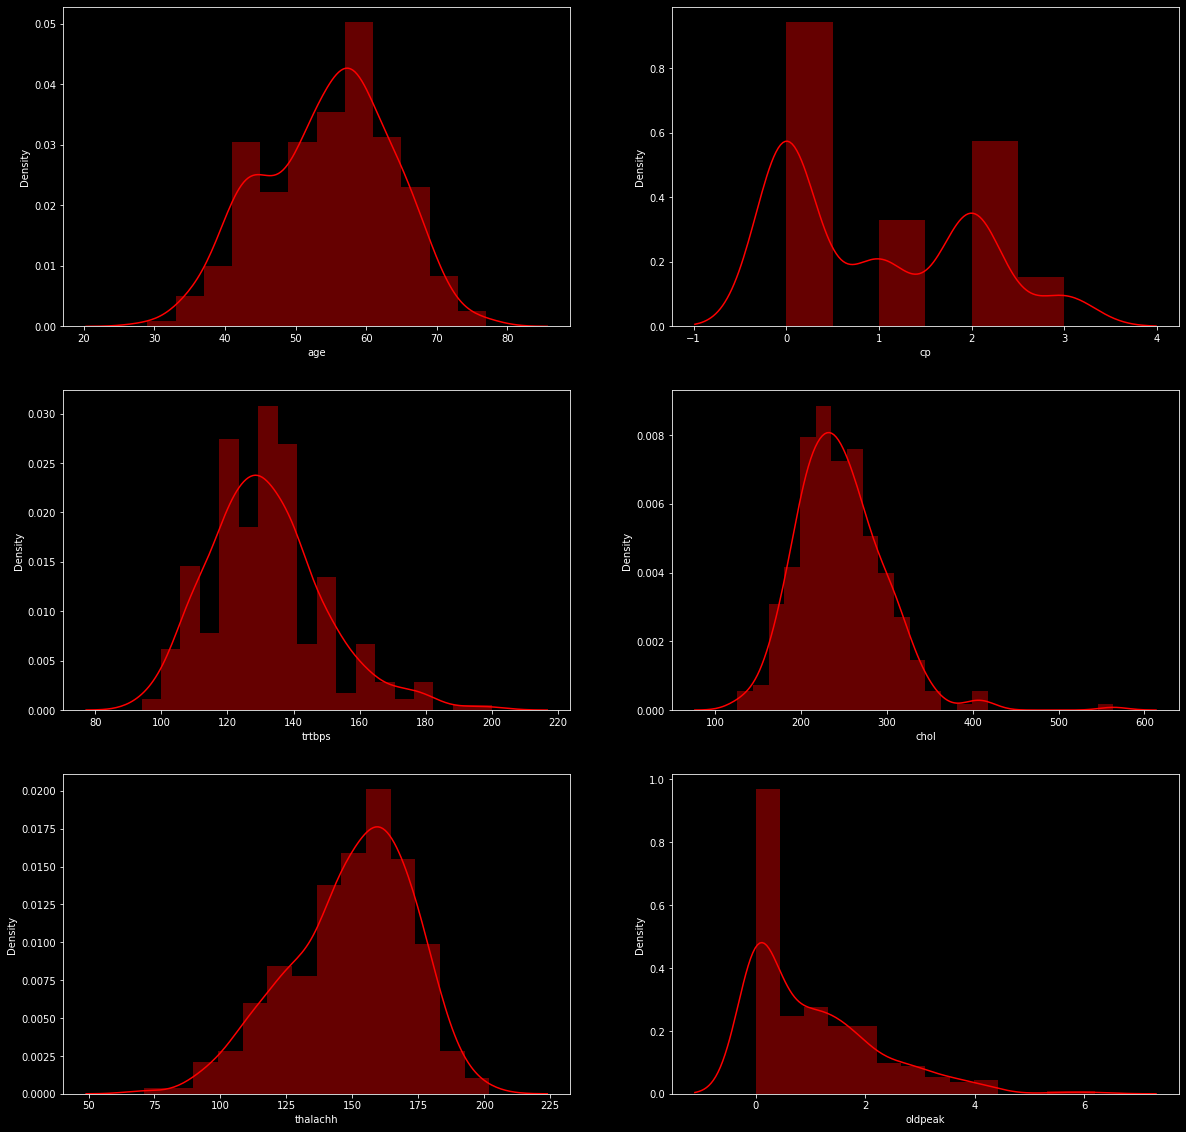

In [ ]:
columns=["age","cp","trtbps","chol","thalachh","oldpeak"]
fig, ax1 = plt.subplots(3,2, figsize=(20,20))
k = 0
for i in range(3):
    for j in range(2):
            sns.distplot(df[columns[k]], ax = ax1[i][j], color = 'red')
            k += 1
plt.show()

# **Data Training**

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_fscore_support as score

import warnings
warnings.filterwarnings("ignore")

In [4]:
def compute(Y_pred,Y_test):
    #Output plot
    plt.figure(figsize=(12,6))
    plt.scatter(range(len(Y_pred)),Y_pred,color="yellow",lw=5,label="Predictions")
    plt.scatter(range(len(Y_test)),Y_test,color="red",label="Actual")
    plt.title("Prediction Values vs Real Values")
    plt.legend()
    plt.show()

    cm=confusion_matrix(Y_test,Y_pred)
    class_label = ["High-risk", "Low-risk"]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm,annot=True,cmap='Pastel1',linewidths=2,fmt='d')
    plt.title("Confusion Matrix",fontsize=15)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    #Calculate Metrics
    acc=accuracy_score(Y_test,Y_pred)
    mse=mean_squared_error(Y_test,Y_pred)
    precision, recall, fscore, train_support = score(Y_test, Y_pred, pos_label=1, average='binary')
    print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {} %\nMean Square Error: {}'.format(
        round(precision, 3), round(recall, 3), round(fscore,3), round((acc*100),3), round((mse),3)))

In [6]:
# creating a copy of df
df1 = df

# define the columns to be encoded and scaled
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# encoding the categorical columns
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# defining the features and target
X = df1.drop(['output'],axis=1)
y = df1[['output']]

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [7]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

**SVC**

In [20]:
# instantiating the object
svm = SVC()

# setting a grid - not so extensive
parameters = {"C":np.arange(1,10,1),'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}

# instantiating the GridSearchCV object
searcher = GridSearchCV(svm, parameters)

# fitting the object
searcher.fit(x_train, y_train)

# the scores
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)

# predicting the values
y_pred_svc = searcher.predict(x_test)

# printing the test accuracy
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_test, y_pred_svc))

The best params are : {'C': 1, 'gamma': 0.01}
The best score is   : 0.8347729789590256
The test accuracy score of SVM after hyper-parameter tuning is  0.8021978021978022


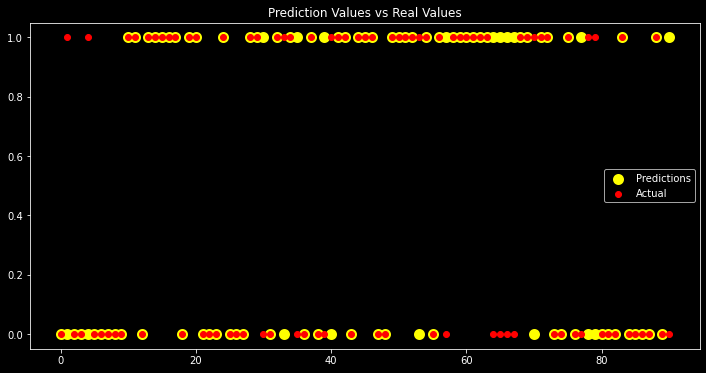

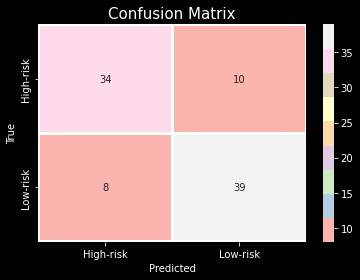

Precision: 0.796 
Recall: 0.83 
F1-Score: 0.812 
Accuracy: 80.22 %
Mean Square Error: 0.198


In [ ]:
compute(y_pred_svc,y_test)

**Random Forest Classifier**

In [19]:

# instantiating the object
rf = RandomForestClassifier()

# setting a grid - not so extensive
parameters = {"n_estimators": range(1, 150, 5)}

# instantiating the GridSearchCV object
searcher = GridSearchCV(rf, parameters)

# fitting the object
searcher.fit(x_train, y_train)

# the scores
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)

# predicting the values
y_pred_rfc = searcher.predict(x_test)

# printing the test accuracy
print("The test accuracy score of Random Forest Classifier is ", accuracy_score(y_test, y_pred_rfc))

The best params are : {'n_estimators': 116}
The best score is   : 0.8067552602436324
The test accuracy score of Random Forest Classifier is  0.7912087912087912


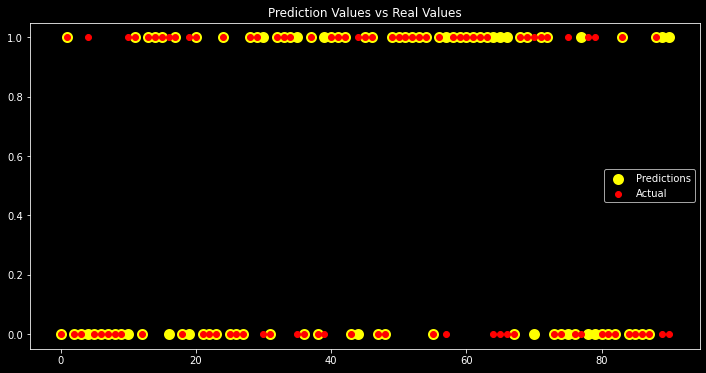

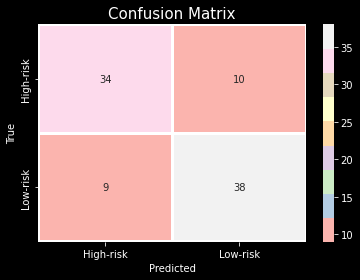

Precision: 0.792 
Recall: 0.809 
F1-Score: 0.8 
Accuracy: 79.121 %
Mean Square Error: 0.209


In [ ]:
compute(y_pred_rfc,y_test)

**Gradient Boosting Classifier**

In [12]:
# instantiating the object
gb = GradientBoostingClassifier()

# setting a grid - not so extensive
parameters = {"learning_rate":np.arange(0.01,1,0.1),'n_estimators':range(1, 150, 5)}

# instantiating the GridSearchCV object
searcher = GridSearchCV(gb, parameters)

# fitting the object
searcher.fit(x_train, y_train)

# the scores
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)

# predicting the values
y_pred_gb = searcher.predict(x_test)

# printing the test accuracy
print("The test accuracy score of Gradient Boosting Classifier is ", accuracy_score(y_test, y_pred_gb))

The best params are : {'learning_rate': 0.6100000000000001, 'n_estimators': 96}
The best score is   : 0.8116279069767443
The test accuracy score of Gradient Boosting Classifier is  0.7362637362637363


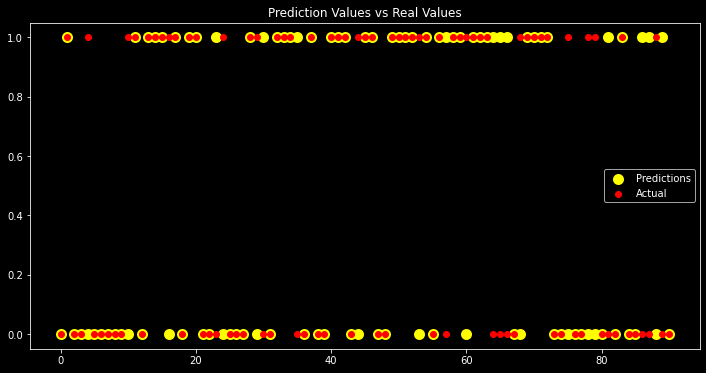

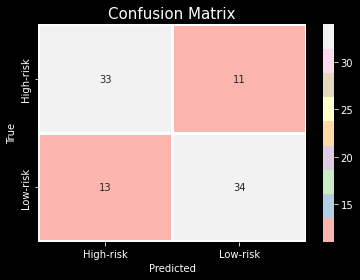

Precision: 0.756 
Recall: 0.723 
F1-Score: 0.739 
Accuracy: 73.626 %
Mean Square Error: 0.264


In [13]:
compute(y_pred_gb,y_test)

**AdaBoost Classifier**

In [9]:
# instantiating the object
Ab = AdaBoostClassifier()

# setting a grid - not so extensive
parameters = {"learning_rate":np.arange(0.01,1,0.1),'n_estimators':range(1, 150, 5)}

# instantiating the GridSearchCV object
searcher = GridSearchCV(Ab, parameters)

# fitting the object
searcher.fit(x_train, y_train)

# the scores
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)

# predicting the values
y_pred_ab = searcher.predict(x_test)

# printing the test accuracy
print("The test accuracy score of AdaBoost Classifier is ", accuracy_score(y_test, y_pred_ab))

The best params are : {'learning_rate': 0.11, 'n_estimators': 121}
The best score is   : 0.8347729789590256
The test accuracy score of Decision Tree is  0.8351648351648352


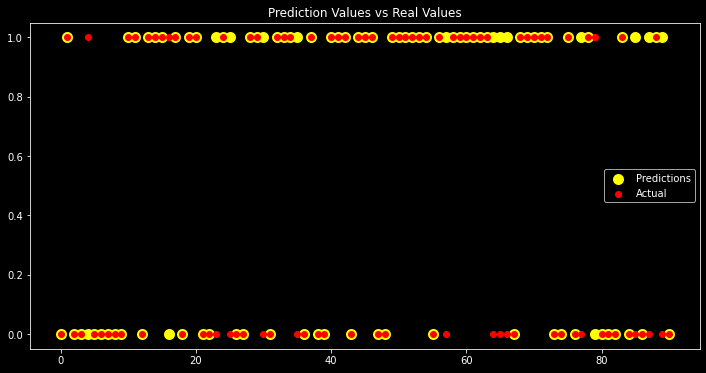

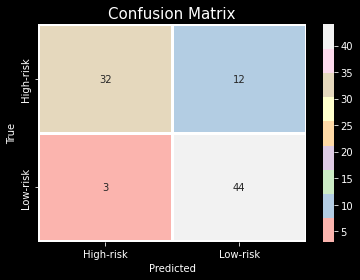

Precision: 0.786 
Recall: 0.936 
F1-Score: 0.854 
Accuracy: 83.516 %
Mean Square Error: 0.165


In [10]:
compute(y_pred_ab,y_test)

**XGB Classifier**

In [32]:
# instantiating the object
XGB = XGBClassifier(max_depth=1,colsample_bytree=0.5)

# setting a grid - not so extensive
parameters = {"learning_rate":np.arange(0.01,1,0.1),'n_estimators':range(1, 150, 5)}

# instantiating the GridSearchCV object
searcher = GridSearchCV(XGB, parameters)

# fitting the object
searcher.fit(x_train, y_train)

# the scores
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)

# predicting the values
y_pred_xgb = searcher.predict(x_test)

# printing the test accuracy
print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred_xgb))

The best params are : {'learning_rate': 0.21000000000000002, 'n_estimators': 96}
The best score is   : 0.8302325581395349
The test accuracy score of Decision Tree is  0.8571428571428571


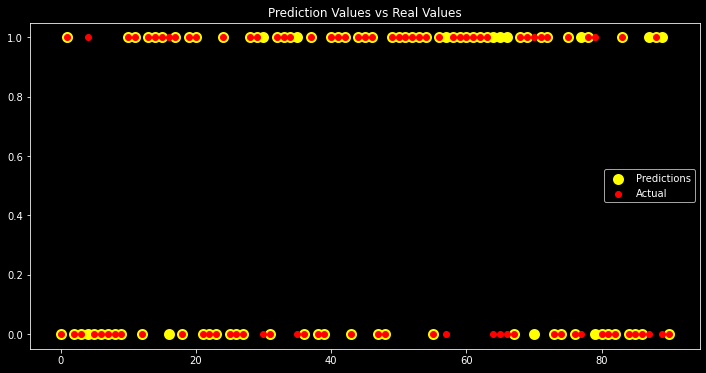

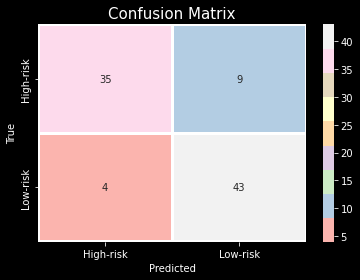

Precision: 0.827 
Recall: 0.915 
F1-Score: 0.869 
Accuracy: 85.714 %
Mean Square Error: 0.143


In [33]:
compute(y_pred_xgb,y_test)

**MLP Classifier**

In [16]:
model_MLP = MLPClassifier(random_state=48,hidden_layer_sizes=(150,100,50),
                          max_iter=150,activation = 'relu',solver='adam')
model_MLP.fit(x_train, y_train)
y_pred_mlp=model_MLP.predict(x_test)

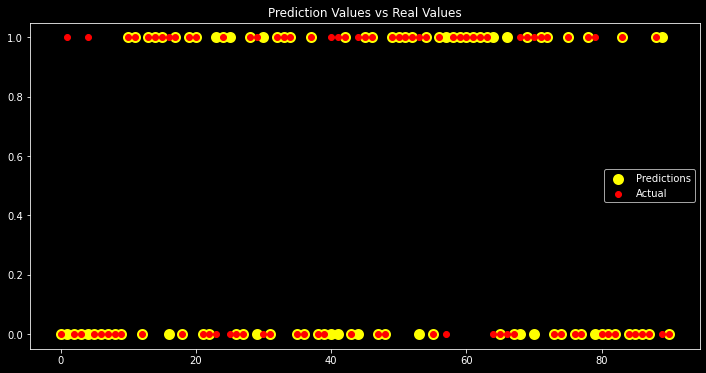

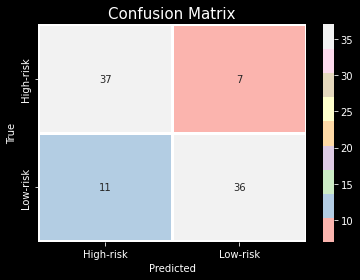

Precision: 0.837 
Recall: 0.766 
F1-Score: 0.8 
Accuracy: 80.22 %
Mean Square Error: 0.198


In [18]:
compute(y_pred_mlp,y_test)

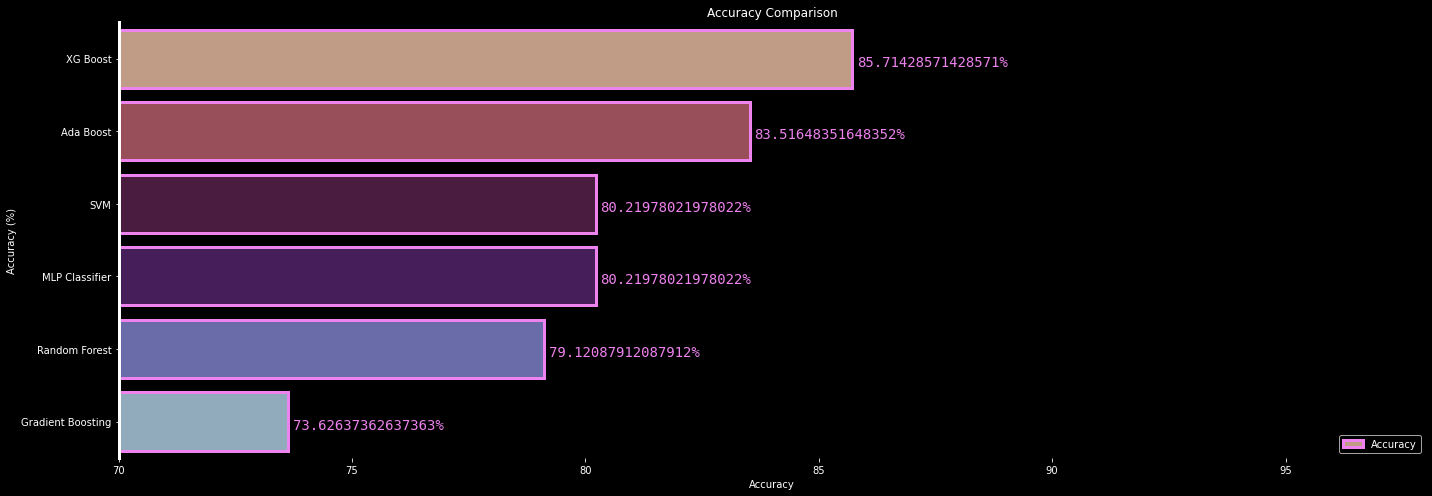

In [34]:
accuracies={"SVM": accuracy_score(y_test, y_pred_svc)*100,
            "Random Forest": accuracy_score(y_test, y_pred_rfc)*100,
            "Ada Boost": accuracy_score(y_test, y_pred_ab)*100,
            "Gradient Boosting": accuracy_score(y_test, y_pred_gb)*100,
            "XG Boost": accuracy_score(y_test, y_pred_xgb)*100,
            "MLP Classifier": accuracy_score(y_test, y_pred_mlp)*100}

acc_list=accuracies.items()
k,v = zip(*acc_list) 
temp=pd.DataFrame(index=k,data=v,columns=["Accuracy"])
temp.sort_values(by=["Accuracy"],ascending=False,inplace=True)

#Plot accuracy for different models
plt.figure(figsize=(20,7))
ACC=sns.barplot(y=temp.index,x=temp["Accuracy"],label="Accuracy",edgecolor="violet",linewidth=3,orient="h",palette="twilight_r")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison")
plt.xlim(70,98)

ACC.spines['left'].set_linewidth(3)
for w in ['right', 'top', 'bottom']:
    ACC.spines[w].set_visible(False)
    
#Write text on barplots
k=0
for ACC in ACC.patches:
    width = ACC.get_width()
    plt.text(width+0.1, (ACC.get_y() + ACC.get_height()-0.3),s="{}%".format(temp["Accuracy"][k]),fontname = 'monospace', fontsize = 14, color = 'violet') 
    k+=1
    
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()